In [138]:
import pandas as pd

path = '../compare_data/'

flatten = pd.read_csv(f'{path}flatten_monthly_article.csv')
gangnam_trade = pd.read_csv('../seoul_apt_trade_data/monthly_trade/강남구_trade.csv', encoding = 'cp949')

In [139]:
dong_name = list(set(gangnam_trade['법정동']))

In [140]:
def day_to_string(string):
    return string[:8].replace('-','')

In [141]:
gangnam_trade_list = []
for dong in dong_name:
    df = gangnam_trade[gangnam_trade['법정동'] == dong]
    df["price"] = df['거래금액']/df['전용면적']
    df.index = [i for i in range(len(df))]
    df['거래일'] = [day_to_string(day) for day in df['거래일']]
    del df['Unnamed: 0']
    gangnam_trade_list.append(df)

<ipython-input-141-b84b504b3168>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = df['거래금액']/df['전용면적']
<ipython-input-141-b84b504b3168>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['거래일'] = [day_to_string(day) for day in df['거래일']]


In [142]:
df = gangnam_trade_list[0].groupby(['거래일'])['price'].mean()
df

거래일
200601     615.621560
200602     601.242775
200603     640.117928
200604     637.202148
200605     618.980963
             ...     
202009    2138.963578
202010    2212.928259
202011    2289.570776
202012    2447.126345
202101    2433.650866
Name: price, Length: 181, dtype: float64

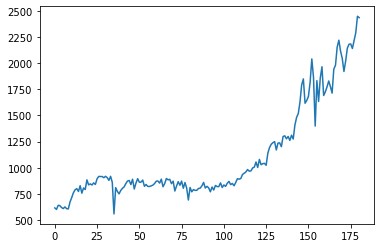

In [143]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(len(df.index))],df)

In [144]:
price_list = list(df)
price_list

[615.6215604919241,
 601.2427748977567,
 640.1179282723792,
 637.2021480103328,
 618.9809634861467,
 609.3013898359243,
 625.1261360521577,
 607.9963823726878,
 606.283735842909,
 671.5930061816653,
 713.7973762310532,
 760.0295812508634,
 788.4357440167531,
 799.6291036582702,
 772.8593250717385,
 827.9225279253715,
 756.4914510277569,
 806.3620316846983,
 790.9964299943733,
 883.486790730647,
 835.9642353380074,
 845.1190709029167,
 834.504574826568,
 854.6374128986099,
 839.9975416555906,
 893.7161289472355,
 916.5094000877748,
 915.3359498744067,
 915.7060323674532,
 904.0348777780229,
 917.6440950046014,
 904.8890304196378,
 879.1123792370369,
 917.3520145157194,
 859.826754187165,
 558.2300522380416,
 809.1553929487036,
 773.4194551951497,
 749.7262109273419,
 782.5293652536797,
 802.5663541415043,
 816.6825036732308,
 847.8719281007528,
 872.1956428831829,
 877.6175505914886,
 838.4563397098036,
 889.9192322670561,
 796.2194965128517,
 852.511092515466,
 894.7346644576938,
 861.

In [145]:
price_list_3week_avg = []
for i in range(len(price_list)-2):
    price_list_3week_avg.append((price_list[i] + price_list[i+1] + price_list[i+2])/3)
price_list_3week_avg

[618.9940878873534,
 626.1876170601562,
 632.1003465896196,
 621.8281671108012,
 617.8028297914096,
 614.1413027535899,
 613.1354180892515,
 628.6243747990874,
 663.8913727518758,
 715.1399878878607,
 754.0875671662233,
 782.6981429752956,
 786.9747242489207,
 800.1369855517934,
 785.757768008289,
 796.9253368792755,
 784.6166375689428,
 826.9484174699063,
 836.8158186876759,
 854.8566989905236,
 838.5292936891641,
 844.7536862093649,
 843.0465097935894,
 862.7836945004786,
 883.4076902302003,
 908.5204929698057,
 915.8504607765449,
 911.6922866732942,
 912.4616683833591,
 908.8560010674206,
 900.5485015537587,
 900.451141390798,
 885.4303826466404,
 778.4696069803086,
 742.4040664579701,
 713.6016334606315,
 777.4336863570651,
 768.5583437920571,
 778.2739767741754,
 800.592741022805,
 822.3735953051627,
 845.5833582190556,
 865.8950405251413,
 862.7565110614918,
 868.6643741894494,
 841.5316894965705,
 846.216607098458,
 847.8217511620038,
 869.4568421053368,
 872.6739449317193,
 868

In [146]:
price_change_per = []
for i in range(1,len(price_list_3week_avg)):
    price_change_per.append((price_list_3week_avg[i] - price_list_3week_avg[i-1]) / price_list_3week_avg[i-1])
price_change_per

[0.011621321291378564,
 0.00944242487135506,
 -0.016250868290517414,
 -0.006473391737937067,
 -0.005926691917316039,
 -0.0016378717077460332,
 0.02526188547075778,
 0.05610186204449993,
 0.07719427791862368,
 0.05446147598792903,
 0.037940654447583134,
 0.005463896026849352,
 0.016725138555669133,
 -0.017970944729655464,
 0.014212482937704456,
 -0.015445235256960253,
 0.05395218234490203,
 0.011932305581960557,
 0.021558961840778774,
 -0.019099581626534662,
 0.007422987565307575,
 -0.0020209162074640514,
 0.02341173882769728,
 0.023904016570065332,
 0.028427195073501627,
 0.008068026933304204,
 -0.004540232583084524,
 0.0008439050338708982,
 -0.003951582231752025,
 -0.009140611388278283,
 -0.00010811207035783899,
 -0.016681370097390562,
 -0.12080088707439116,
 -0.04632877147540434,
 -0.038796168149718965,
 0.08945054201582775,
 -0.01141620529282238,
 0.012641373372100044,
 0.028677258799192265,
 0.027205910279090695,
 0.0282228941279181,
 0.02402091066322023,
 -0.003624607275433887,
 0

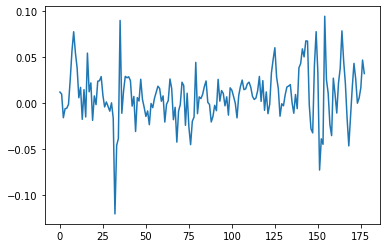

In [147]:
plt.plot(price_change_per)

In [148]:
gangnam_trade = pd.read_csv('../seoul_apt_trade_data/weekly_trade/강남구_trade.csv')

In [149]:
gangnam_trade_list = []
for dong in dong_name:
    df = gangnam_trade[gangnam_trade['법정동'] == dong]
    df["price"] = df['거래금액']/df['전용면적']
    df.index = [i for i in range(len(df))]
    del df['Unnamed: 0']
    gangnam_trade_list.append(df)

<ipython-input-149-b63c1485f649>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = df['거래금액']/df['전용면적']


In [150]:
gangnam_trade["price"] = gangnam_trade['거래금액']/gangnam_trade['전용면적']
df = gangnam_trade.groupby(['거래주'])['price'].mean()
df

거래주
0       978.363602
1       849.507117
2       913.661592
3       888.182054
4       823.804004
          ...     
783    2226.330323
784    2195.879772
785    2020.891726
786    1963.940552
787    2826.459881
Name: price, Length: 788, dtype: float64

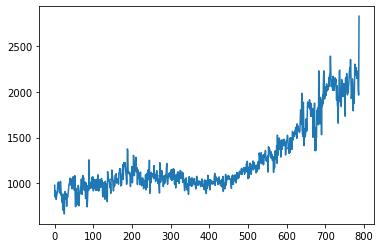

In [151]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(len(df.index))],df)

In [152]:
price_list = list(df)
len(price_list)

788

In [153]:
price_list_3week_avg = []
for i in range(2,len(price_list)):
    price_list_3week_avg.append((price_list[i] + price_list[i-1] + price_list[i-2])/3)
len(price_list_3week_avg)

786

In [154]:
price_change_per = []
for i in range(1,len(price_list_3week_avg)):
    value = (price_list_3week_avg[i] - price_list_3week_avg[i-1]) / price_list_3week_avg[i-1]
    price_change_per.append(value)

In [155]:
len(price_change_per)

785

In [156]:
value1 = (price_list[2] + price_list[1] + price_list[0])/3
value2 = (price_list[-1] + price_list[-2] + price_list[-3])/3
result = (value2 - value1) / value1
result = result/786
result

0.001888656022488067

In [157]:
_sum = 0
for i in price_change_per:
    _sum += i
average = _sum/len(price_change_per)
average

0.0015991851207438955

In [158]:
change_list = []
for value in price_change_per:
    if value >= result:
        change_list.append(1)
    else:
        change_list.append(0)

In [159]:
import pandas as pd

read_path = '../article/headline_keyword/'
table = pd.read_csv(f'{read_path}keyword_about_location.csv')

del table['Unnamed: 0']

In [160]:
table

,서울,대치동,분당,용인,판교,하남,가좌뉴타운,판교신도시,두바이,강남,...,강동남양주왕숙,강일왕숙신도시,하남남양주,강일동하남남양주,탕정2A6블록,북신항,의왕초평A3블록,수원당수2지구,아산탕정2A6블록,코로
0,37.0,1.0,10.0,9.0,24.0,3.0,2.0,4.0,1.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,2.0,3.0,4.0,52.0,0.0,0.0,9.0,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23.0,2.0,0.0,4.0,56.0,0.0,5.0,7.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21.0,0.0,10.0,12.0,120.0,0.0,0.0,14.0,0.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28.0,2.0,5.0,10.0,45.0,2.0,0.0,3.0,0.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,197.0,1.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
779,120.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,158.0,1.0,0.0,6.0,3.0,1.0,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781,112.0,0.0,0.0,17.0,3.0,0.0,0.0,0.0,0.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
table = table[3:]
table.index = [i for i in range(len(table))]
table

,서울,대치동,분당,용인,판교,하남,가좌뉴타운,판교신도시,두바이,강남,...,강동남양주왕숙,강일왕숙신도시,하남남양주,강일동하남남양주,탕정2A6블록,북신항,의왕초평A3블록,수원당수2지구,아산탕정2A6블록,코로
0,21.0,0.0,10.0,12.0,120.0,0.0,0.0,14.0,0.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,2.0,5.0,10.0,45.0,2.0,0.0,3.0,0.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.0,0.0,6.0,7.0,130.0,2.0,0.0,8.0,0.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24.0,1.0,10.0,11.0,44.0,2.0,0.0,2.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41.0,0.0,3.0,11.0,70.0,5.0,0.0,4.0,0.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,197.0,1.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776,120.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,158.0,1.0,0.0,6.0,3.0,1.0,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
778,112.0,0.0,0.0,17.0,3.0,0.0,0.0,0.0,0.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
table["change"] = change_list[:780]
table

<ipython-input-162-6433c7207174>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table["change"] = change_list[:780]


,서울,대치동,분당,용인,판교,하남,가좌뉴타운,판교신도시,두바이,강남,...,강일왕숙신도시,하남남양주,강일동하남남양주,탕정2A6블록,북신항,의왕초평A3블록,수원당수2지구,아산탕정2A6블록,코로,change
0,21.0,0.0,10.0,12.0,120.0,0.0,0.0,14.0,0.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,28.0,2.0,5.0,10.0,45.0,2.0,0.0,3.0,0.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,25.0,0.0,6.0,7.0,130.0,2.0,0.0,8.0,0.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,24.0,1.0,10.0,11.0,44.0,2.0,0.0,2.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,41.0,0.0,3.0,11.0,70.0,5.0,0.0,4.0,0.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,197.0,1.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
776,120.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
777,158.0,1.0,0.0,6.0,3.0,1.0,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
778,112.0,0.0,0.0,17.0,3.0,0.0,0.0,0.0,0.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [274]:
table

,서울,대치동,분당,용인,판교,하남,가좌뉴타운,판교신도시,두바이,강남,...,강일왕숙신도시,하남남양주,강일동하남남양주,탕정2A6블록,북신항,의왕초평A3블록,수원당수2지구,아산탕정2A6블록,코로,change
0,21.0,0.0,10.0,12.0,120.0,0.0,0.0,14.0,0.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,28.0,2.0,5.0,10.0,45.0,2.0,0.0,3.0,0.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,25.0,0.0,6.0,7.0,130.0,2.0,0.0,8.0,0.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,24.0,1.0,10.0,11.0,44.0,2.0,0.0,2.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,41.0,0.0,3.0,11.0,70.0,5.0,0.0,4.0,0.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,197.0,1.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
776,120.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
777,158.0,1.0,0.0,6.0,3.0,1.0,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
778,112.0,0.0,0.0,17.0,3.0,0.0,0.0,0.0,0.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [164]:
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [200]:
model = sm.Logit.from_formula("change ~ 서울 + 강남", table)

model = model.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.691428
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 change   No. Observations:                  780
Model:                          Logit   Df Residuals:                      777
Method:                           MLE   Df Model:                            2
Date:                Fri, 21 May 2021   Pseudo R-squ.:                0.002096
Time:                        11:17:36   Log-Likelihood:                -539.31
converged:                       True   LL-Null:                       -540.45
Covariance Type:            nonrobust   LLR p-value:                    0.3221
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2006      0.152     -1.323      0.186      -0.498       0.097
서울             0.0026      0.

In [398]:
import pandas as pd

read_path = '../article/headline_keyword/'

price_up_df = pd.read_csv(f'{read_path}keyword_about_price_up.csv')
price_down_df = pd.read_csv(f'{read_path}keyword_about_price_down.csv')
price_stay_df = pd.read_csv(f'{read_path}keyword_about_price_stay.csv')

In [399]:
price_up_df = price_up_df[3:]
price_up_df.index = [i for i in range(len(table))]
price_up_df['change'] = change_list[:780]
price_down_df = price_down_df[3:]
price_up_df.index = [i for i in range(len(table))]
price_down_df['change'] = change_list[:780]
price_stay_df = price_stay_df[3:]
price_up_df.index = [i for i in range(len(table))]
price_stay_df['change'] = change_list[:780]

In [388]:
price_up_df.columns

Index(['Unnamed: 0', 'total', '상승세', '상승', '올라', '급등', '상승…', '오름세', '상승..',
       '상승...', 'change'],
      dtype='object')

In [389]:
price_down_df.columns

Index(['Unnamed: 0', 'total', '하락세', '하락', '급락', '내림세', '하락…', '하락...', '하락..',
       'change'],
      dtype='object')

In [390]:
price_down_df['하락'] = price_down_df['하락…'] + price_down_df['하락...'] + price_down_df['하락..']

In [391]:
price_stay_df.columns

Index(['Unnamed: 0', 'total', '약세', '안정세', '보합세', '보합', 'change'], dtype='object')

In [392]:
price_up_df['상승'] = price_up_df['상승…'] + price_up_df['상승..'] + price_up_df['상승...']

In [382]:
model = sm.Logit.from_formula("change ~ 상승 + 상승세 + 올라 + 급등 + 오름세 + total", price_up_df)

model = model.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.689112
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 change   No. Observations:                  780
Model:                          Logit   Df Residuals:                      773
Method:                           MLE   Df Model:                            6
Date:                Fri, 21 May 2021   Pseudo R-squ.:                0.005439
Time:                        13:22:05   Log-Likelihood:                -537.51
converged:                       True   LL-Null:                       -540.45
Covariance Type:            nonrobust   LLR p-value:                    0.4369
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2103      0.147     -1.428      0.153      -0.499       0.078
상승            -0.0837      0.

In [373]:
model = sm.Logit.from_formula("change ~ 하락세 + 하락 + 급락 + 내림세 + total", price_down_df)

model = model.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.689255
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 change   No. Observations:                  780
Model:                          Logit   Df Residuals:                      774
Method:                           MLE   Df Model:                            5
Date:                Fri, 21 May 2021   Pseudo R-squ.:                0.005233
Time:                        13:21:39   Log-Likelihood:                -537.62
converged:                       True   LL-Null:                       -540.45
Covariance Type:            nonrobust   LLR p-value:                    0.3411
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0198      0.111      0.178      0.859      -0.198       0.237
하락세            0.0679      0.

In [374]:
for i in range(1,10):
    price_up_df = price_up_df[1:]
    price_up_df['change'] = change_list[:(780-i)]
    
    model = sm.Logit.from_formula("change ~ 상승 + 상승세 + 올라 + 급등 + 오름세 + total", price_up_df)

    model = model.fit()
    print(model.summary())

Optimization terminated successfully.
         Current function value: 0.689349
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 change   No. Observations:                  779
Model:                          Logit   Df Residuals:                      772
Method:                           MLE   Df Model:                            6
Date:                Fri, 21 May 2021   Pseudo R-squ.:                0.005053
Time:                        13:21:40   Log-Likelihood:                -537.00
converged:                       True   LL-Null:                       -539.73
Covariance Type:            nonrobust   LLR p-value:                    0.4870
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2286      0.147     -1.553      0.121      -0.517       0.060
상승            -0.0927      0.

<ipython-input-374-27ff5b8692bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_up_df['change'] = change_list[:(780-i)]
<ipython-input-374-27ff5b8692bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_up_df['change'] = change_list[:(780-i)]
<ipython-input-374-27ff5b8692bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

                           Logit Regression Results                           
Dep. Variable:                 change   No. Observations:                  774
Model:                          Logit   Df Residuals:                      767
Method:                           MLE   Df Model:                            6
Date:                Fri, 21 May 2021   Pseudo R-squ.:                0.003226
Time:                        13:21:40   Log-Likelihood:                -534.56
converged:                       True   LL-Null:                       -536.29
Covariance Type:            nonrobust   LLR p-value:                    0.7492
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2124      0.147     -1.442      0.149      -0.501       0.076
상승            -0.0455      0.044     -1.023      0.306      -0.133       0.042
상승세           -0.0032      0.029     -0.110      0.9

<ipython-input-374-27ff5b8692bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_up_df['change'] = change_list[:(780-i)]
<ipython-input-374-27ff5b8692bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_up_df['change'] = change_list[:(780-i)]


In [401]:
for i in range(1,10):
    price_up_df = price_up_df[:-1]
    price_up_df['change'] = change_list[i:780+i]
    price_up_df.index = [i for i in range(780)]
    model = sm.Logit.from_formula("change ~ 상승 + 상승세 + 올라 + 급등 + 오름세 + total", price_up_df)

    model = model.fit()
    print(model.summary())

ValueError: Length of values (780) does not match length of index (778)

In [321]:
gangnam_trade_list[0].groupby(['거래주']).mean()

,지역코드,전용면적,층,건축년도,거래금액,면적당가격,count,price
거래주,,,,,,,,
0,11680.0,37.960000,9.500000,1992.250000,21417.500000,562.958026,1.0,562.958026
1,11680.0,57.186250,8.375000,1994.375000,37750.000000,633.704549,1.0,633.704549
2,11680.0,61.200833,8.583333,1993.750000,39039.166667,613.579840,1.0,613.579840
3,11680.0,56.673077,8.230769,1993.076923,36057.692308,624.681492,1.0,624.681492
4,11680.0,55.581818,7.909091,1993.636364,33681.818182,586.594637,1.0,586.594637
...,...,...,...,...,...,...,...,...
783,11680.0,45.730000,7.000000,1993.000000,111625.000000,2467.985792,1.0,2467.985792
784,11680.0,49.615000,9.250000,1992.750000,130800.000000,2637.262537,1.0,2637.262537
785,11680.0,71.188333,9.166667,2003.000000,153133.333333,2251.181640,1.0,2251.181640


In [322]:
df = gangnam_trade_list[0].groupby(['거래주']).mean()

empty_idx = []
for i in range(788):
    if i not in df.index: empty_idx.append(i)

In [323]:
def fill_empty_price(df):
    df_fill = []

    for i in range(788):
        if i not in df.index:
            if i == 0: return df_fill
            df_fill.append(df_fill[i-1])
        else:
            df_fill.append(df.loc[i,'price']) 
    return df_fill

In [324]:
def return_logit(price_list):
    price_list_3week_avg = []
    for i in range(2,len(price_list)):
        price_list_3week_avg.append((price_list[i] + price_list[i-1] + price_list[i-2])/3)
    len(price_list_3week_avg)

    price_change_per = []
    for i in range(1,len(price_list_3week_avg)):
        value = (price_list_3week_avg[i] - price_list_3week_avg[i-1]) / price_list_3week_avg[i-1]
        price_change_per.append(value)

    value1 = (price_list[2] + price_list[1] + price_list[0])/3
    value2 = (price_list[-1] + price_list[-2] + price_list[-3])/3
    result = (value2 - value1) / value1
    result = result/786
    result

    change_list = []
    for value in price_change_per:
        if value >= result:
            change_list.append(1)
        else:
            change_list.append(0)
    return change_list

In [326]:
for i in range(len(dong_name)):
    df = gangnam_trade_list[i].groupby(['거래주']).mean()
    price_list = fill_empty_price(df)
    if len(price_list) != 0:
        price_up_df['change'] = return_logit(price_list)[:780]
    model = sm.Logit.from_formula("change ~ 상승 + 상승세 + 올라 + 급등 + 오름세 + total", price_up_df)

    model = model.fit()
    print(model.summary())

Optimization terminated successfully.
         Current function value: 0.689824
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 change   No. Observations:                  780
Model:                          Logit   Df Residuals:                      773
Method:                           MLE   Df Model:                            6
Date:                Fri, 21 May 2021   Pseudo R-squ.:                0.003868
Time:                        12:48:18   Log-Likelihood:                -538.06
converged:                       True   LL-Null:                       -540.15
Covariance Type:            nonrobust   LLR p-value:                    0.6525
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2510      0.147     -1.706      0.088      -0.539       0.037
상승             0.0009      0.

Optimization terminated successfully.
         Current function value: 0.690473
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 change   No. Observations:                  780
Model:                          Logit   Df Residuals:                      773
Method:                           MLE   Df Model:                            6
Date:                Fri, 21 May 2021   Pseudo R-squ.:                0.003475
Time:                        12:48:19   Log-Likelihood:                -538.57
converged:                       True   LL-Null:                       -540.45
Covariance Type:            nonrobust   LLR p-value:                    0.7097
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2286      0.147     -1.555      0.120      -0.517       0.059
상승            -0.0482      0.

Optimization terminated successfully.
         Current function value: 0.680900
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 change   No. Observations:                  780
Model:                          Logit   Df Residuals:                      773
Method:                           MLE   Df Model:                            6
Date:                Fri, 21 May 2021   Pseudo R-squ.:                 0.01616
Time:                        12:48:19   Log-Likelihood:                -531.10
converged:                       True   LL-Null:                       -539.82
Covariance Type:            nonrobust   LLR p-value:                  0.007787
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4112      0.150     -2.736      0.006      -0.706      -0.117
상승            -0.0122      0.

In [300]:
price_up_df

,Unnamed: 0,total,상승세,상승,올라,급등,상승…,오름세,상승..,상승...,change
9,12,14.0,2.0,1.0,3.0,2.0,1.0,3.0,0.0,0.0,0
10,13,16.0,6.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0
11,14,12.0,5.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0
12,15,14.0,3.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0
13,16,39.0,4.0,3.0,12.0,4.0,3.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
775,778,89.0,11.0,4.0,9.0,15.0,4.0,1.0,0.0,0.0,0
776,779,54.0,2.0,3.0,8.0,5.0,2.0,2.0,0.0,1.0,1
777,780,53.0,5.0,5.0,4.0,11.0,3.0,0.0,0.0,2.0,1
778,781,50.0,7.0,7.0,8.0,3.0,7.0,0.0,0.0,0.0,0


In [333]:
change_gap = []
for value in price_change_per:
    change_gap.append(value - result)
change_gap

[-0.034783234034197336,
 -0.011583002733121227,
 -0.021665798459596115,
 -0.005209758317789465,
 0.03262929910801863,
 0.049942528523995014,
 0.041199640044525324,
 0.0330918582016919,
 -0.014378365837830044,
 -0.03428209908933946,
 -0.044054461570094926,
 -0.0032170715019715843,
 0.040937108839845034,
 0.02150669659736424,
 -0.03325606656646437,
 -0.048768293024206204,
 -0.0627606738981846,
 -0.016556855939936957,
 -0.0740245744548658,
 0.017081132269045052,
 0.01983099535393758,
 0.021520835435796245,
 -0.07196890118692312,
 0.0013296268579729216,
 0.06129650455209311,
 0.08670289900808134,
 -0.025128131416659445,
 -0.011360298372395501,
 -0.053947708555116956,
 0.017163031761474223,
 -0.018089762993362016,
 0.03989539604201641,
 0.009372980279880474,
 0.03464276107488073,
 0.04724804445188315,
 0.03363358776360303,
 0.022949437922328453,
 0.022610639060200742,
 -0.00822948398143606,
 0.004922606576945905,
 -0.00476631428028121,
 -0.010390955563277971,
 -0.033075946871052225,
 -0.032

In [343]:
from scipy import stats

x = change_gap[:780]
y = fill_empty_price(gangnam_trade_list[i].groupby(['거래주']).mean()['price'])[:780]

print(stats.pearsonr(x,y))

IndexingError: Too many indexers

In [341]:
len(change_gap[:780])

780